In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files
uploaded = files.upload()


Saving HousingData.csv to HousingData.csv


In [3]:
df = pd.read_csv("HousingData.csv")
df.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
print("Dataset Info:")
df.info()

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB

Summary Statistics:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083

In [5]:
# Convert object-type columns to numeric (if any)
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Converting column: {col}")
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill any missing values with column mean
df.fillna(df.mean(), inplace=True)


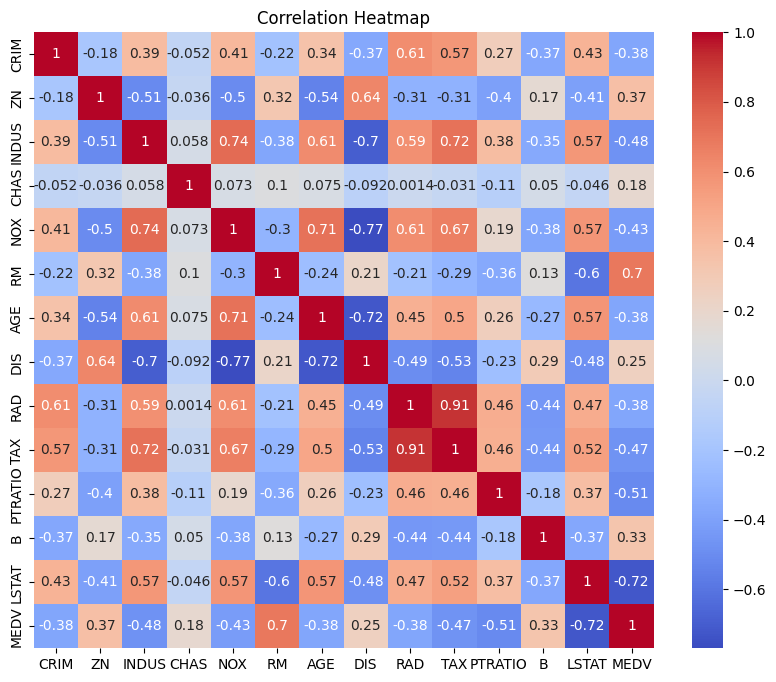

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [7]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


# Task
Solve the error in the provided code by handling missing values, splitting the data, training a linear regression model, evaluating its performance, and visualizing the results.

## Handle missing values

### Subtask:
Fill any missing values in the dataframe with appropriate strategies like mean, median, or mode.


**Reasoning**:
Calculate the mean of each column and fill the missing values with the calculated means in place.



In [10]:
df.fillna(df.mean(), inplace=True)

## Train a model

### Subtask:
Train a linear regression model on the training data.


**Reasoning**:
Instantiate and fit a linear regression model to the training data.



In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

### Subtask:
Evaluate the model's performance on the testing data using metrics like Mean Squared Error and R-squared.


**Reasoning**:
Evaluate the trained model's performance on the test data using MSE and R-squared.



In [12]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 25.01767202384268
R-squared (R2): 0.6588520195508143


## Visualize results

### Subtask:
Visualize the actual vs predicted values to understand the model's performance.


**Reasoning**:
Visualize the actual vs predicted values using a scatter plot and add a diagonal line for reference.



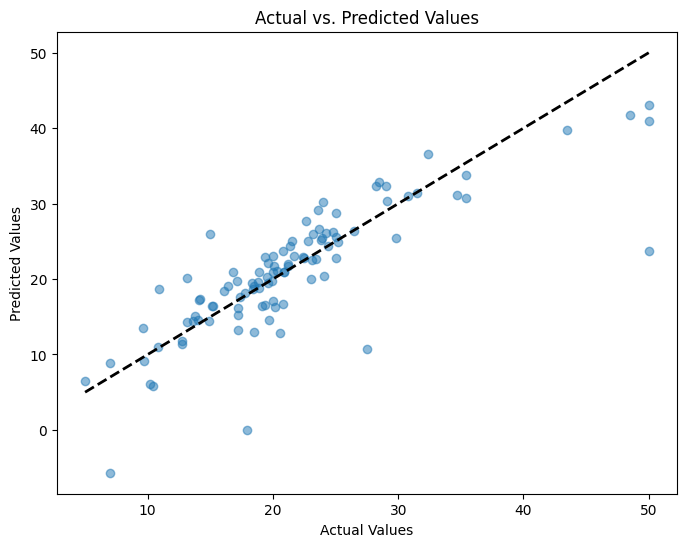

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

## Summary:

### Data Analysis Key Findings

*   Missing values in the dataframe were successfully handled by filling them with the mean of each column.
*   A Linear Regression model was successfully trained on the training data.
*   The trained model's performance on the testing data was evaluated, resulting in a Mean Squared Error (MSE) of approximately 25.02 and an R-squared (\$R^2\$) of approximately 0.66.
*   A scatter plot visualizing the actual vs. predicted values was generated, including a reference line for comparison.

### Insights or Next Steps

*   The \$R^2\$ value of 0.66 suggests that the model explains a moderate portion of the variance in the target variable, indicating room for potential improvement.
*   Further analysis could involve exploring other regression algorithms, feature engineering, or hyperparameter tuning to potentially improve the model's performance.
